# Bike Sharing Assignment

## Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding the Data

In [2]:
data= pd.read_csv(r"C:\Users\yasin\Downloads\day.csv")

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Looking at the datas number of rows and columns
data.shape

(730, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Cleaning

### Renaming columns for readability

In [7]:
data.rename(columns = {'yr':'year', 'mnth':'month','hum':'humidity'}, inplace = True)

In [8]:
data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dropping Insigneficant Columns 

In [9]:
# Instant - We have removed instant as it is just a row identifier and not relevant to the analysis
# Date(dteday) - We have removed date from the data as we have year and month available
# Casual & registered - These columns are dependant on each other and We have the total usage target variable available hence no need for these columns

data.drop(['instant','dteday','casual','registered'], axis = 1, inplace= True)

In [10]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Mapping Data to a different value

In [11]:
data.describe()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [12]:
data['season'] = data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data['month'] = data['month'].map({ 1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'june', 7:'july', 8:'aug', 9:'sep', 10:'oct', 11:'nov',12:'dec'})
data['weekday'] = data['weekday'].map({0:'sunday', 1:'monday', 2:'tuesday', 3:'wednesday', 4:'thursday', 5:'friday', 6:'saturday'})
data['weathersit'] = data['weathersit'].map({1:'clear', 2:'mist/cloudy', 3:'light_snow/rain', 4:'heavy_snow/rain'})

In [13]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,monday,1,mist/cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tuesday,1,mist/cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


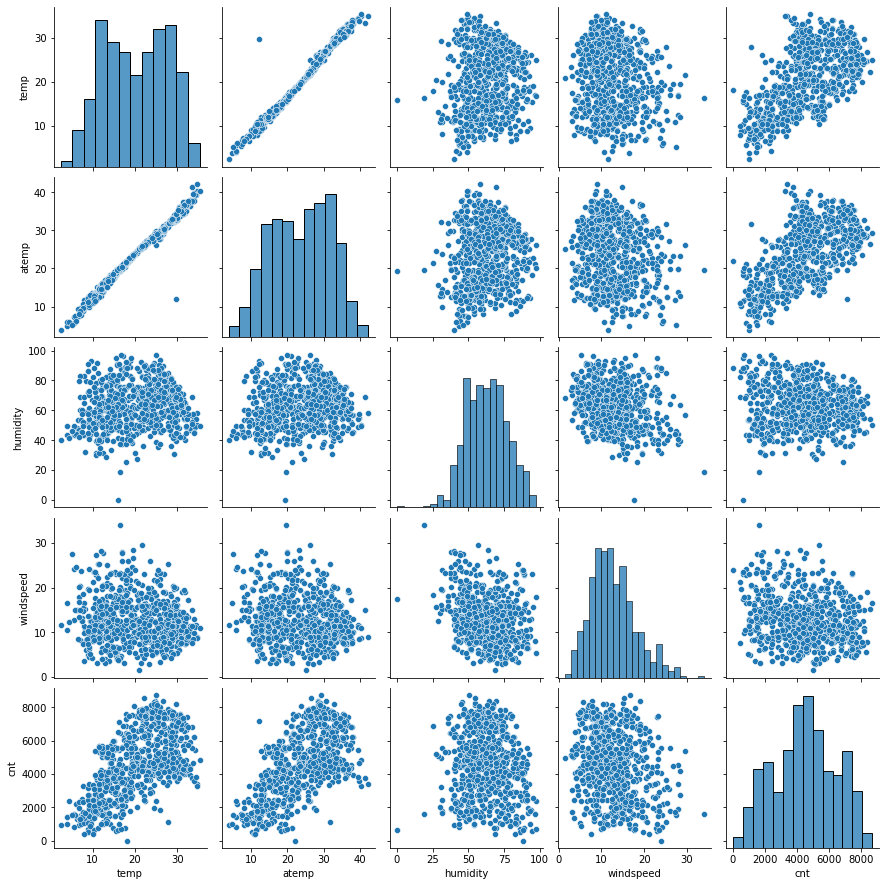

In [14]:
# Creating pairplot for numerical data and visualizing it
sns.pairplot(data, vars = ('temp','atemp','humidity','windspeed','cnt'))
plt.show()

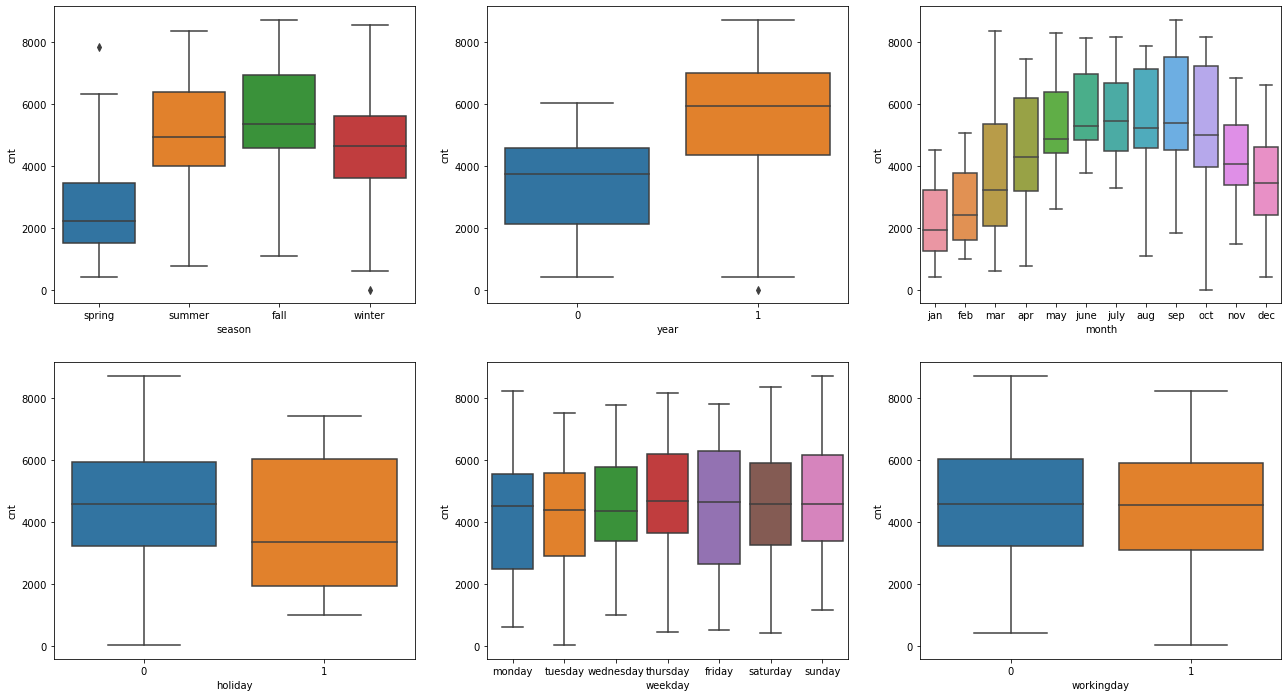

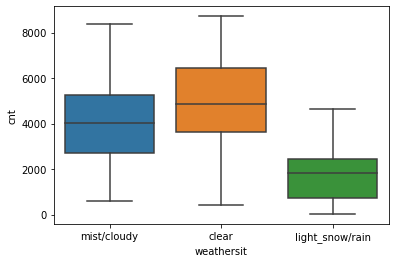

In [15]:
# Creating boxplots of categorical data and visualizing it 
plt.figure(figsize=(22, 12))
plt.subplot(2,3,1)
sns.boxplot(x ='season',y = 'cnt', data= data)
plt.subplot(2,3,2)
sns.boxplot(x ='year',y = 'cnt', data= data)
plt.subplot(2,3,3)
sns.boxplot(x ='month',y = 'cnt', data= data)
plt.subplot(2,3,4)
sns.boxplot(x ='holiday',y = 'cnt', data= data)
plt.subplot(2,3,5)
sns.boxplot(x ='weekday',y = 'cnt', data= data)
plt.subplot(2,3,6)
sns.boxplot(x ='workingday',y = 'cnt', data= data)
plt.show()
sns.boxplot(x ='weathersit',y = 'cnt', data= data)
plt.show()

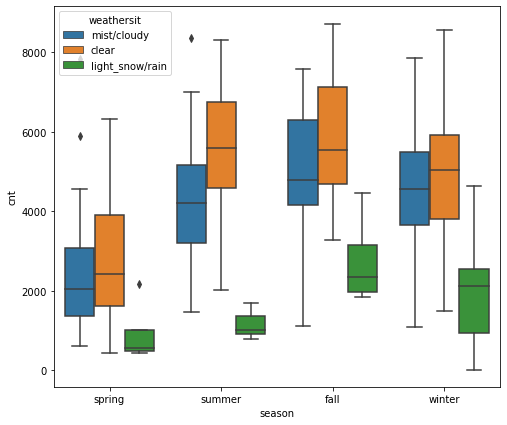

In [16]:
# Graph of cnt versus season with hue of weather situation
plt.figure(figsize = (8,7))
sns.boxplot(x = 'season', y = 'cnt', hue= 'weathersit', data= data)
plt.show()

### Correlation between numerical Variables 

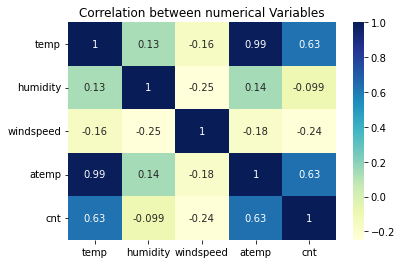

In [17]:
# Creating a correlation heatmap
sns.heatmap(data[['temp','humidity','windspeed','atemp','cnt']].corr() , cmap = 'YlGnBu', annot = True)
plt.title('Correlation between numerical Variables')
plt.show()

# Step 3- Data Preparation

### Creating Dummy Variables

In [18]:
dum1 = pd.get_dummies(data.season, drop_first = True)
dum2 = pd.get_dummies(data.month, drop_first = True)
dum3 = pd.get_dummies(data.weekday, drop_first = True)
dum4 = pd.get_dummies(data.weathersit, drop_first = True)

In [19]:
dum3.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [20]:
# Concatanating dummy variables with main data
data = pd.concat([data,dum1,dum2,dum3,dum4], axis = 1)

In [21]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow/rain,mist/cloudy
0,spring,0,jan,0,monday,1,mist/cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tuesday,1,mist/cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wednesday,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thursday,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,friday,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


### Dropping Irrelevant columns

In [22]:
#Lets drop Season, month, weekday, weathersit as they are strings and they're irrelevant for our analysis
data.drop(['season','month','weekday','weathersit'], axis= 1, inplace=True)

In [23]:
data.shape

(730, 30)

# Step- 4 Splitting the data into Training and testing sets

In [24]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(data , train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
df_train.shape

(510, 30)

In [26]:
df_test.shape

(219, 30)

### Rescaling the Features using min- max scaling

In [27]:
#importing the minmaxscaler from sklearn
from sklearn.preprocessing import MinMaxScaler
#initiating an object
scaler = MinMaxScaler()
#Applying the scaling to all the numerical variable including the target variable 
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
#Fitting the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [28]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow/rain,mist/cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [29]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow/rain,mist/cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

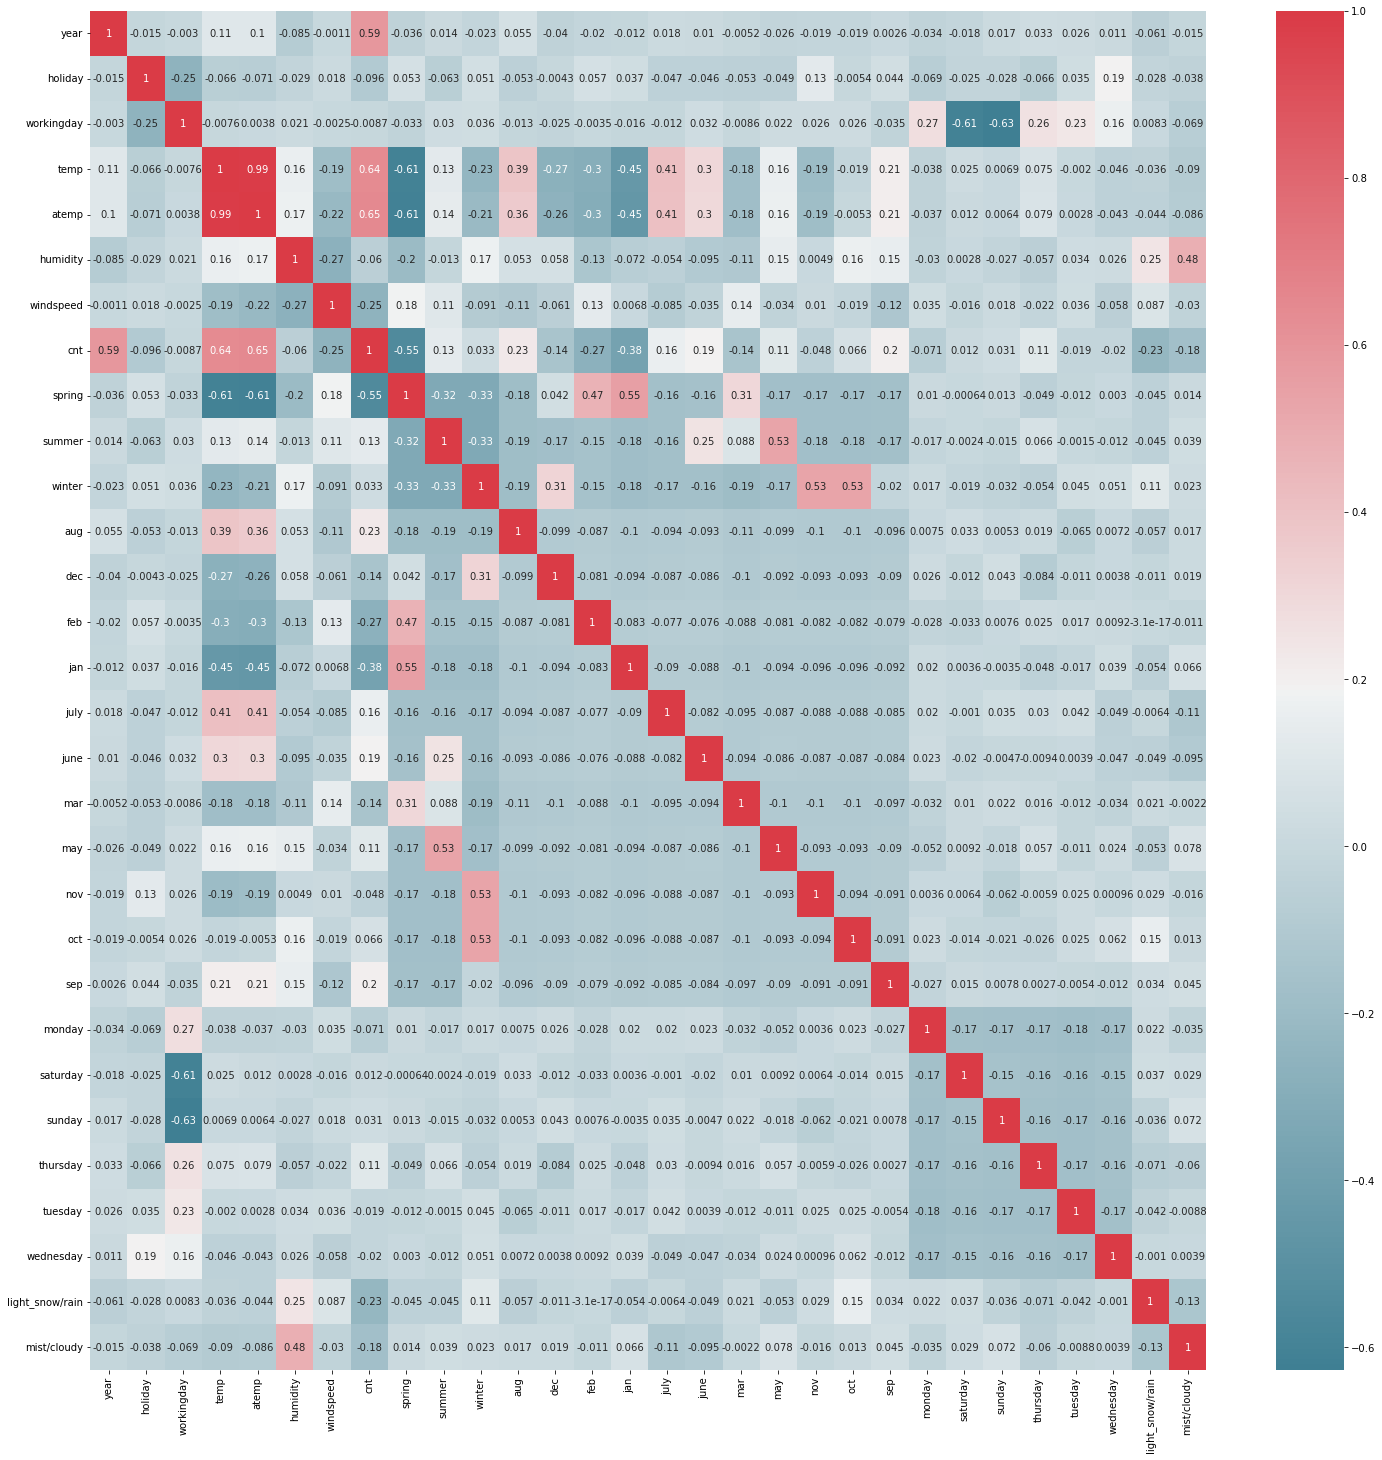

In [30]:
# Checking variable correlations using coefficients to see which variables are highly correlated 
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot= True, cmap=sns.diverging_palette(220, 10, as_cmap=True))

- This heatmap shows the correlation between different Variables, Blue being the least correlated and Red being the Highest      correlated
- As you can see Cnt is highly correlated with temp and atemp followed by year 

### Dividing data into X and Y sets for Model building 

In [31]:
y_train = df_train.pop('cnt')
X_train = df_train

In [32]:
#Checking the shape of the data, y_train only consists of cnt series 
print(X_train.shape)
print(y_train.shape)

(510, 29)
(510,)


### Applying Recursive Feature Elimination (RFE)

In [33]:
# Importing RFE and linear Regression
# Using RFE method to select variables
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
#Creating an object and then fitting
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe= RFE(lm, n_features_to_select=15)
rfe= rfe.fit(X_train,y_train)

In [35]:
#RFE support shows which variables a significant and rfe ranking shows their ranks in order of significance 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('monday', False, 9),
 ('saturday', False, 4),
 ('sunday', False, 5),
 ('thursday', False, 13),
 ('tuesday', False, 8),
 ('wednesday', False, 11),
 ('light_snow/rain', True, 1),
 ('mist/cloudy', True, 1)]

In [36]:
# Creating variable for significant columns
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'july', 'nov', 'sep', 'light_snow/rain',
       'mist/cloudy'],
      dtype='object')


In [37]:
# Checking Columns which were rejected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct',
       'monday', 'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [38]:
# Selecting columns with RFE support = True
X_train_rfe = X_train[col]
X_train_rfe

,year,holiday,temp,humidity,windspeed,spring,summer,winter,dec,jan,july,nov,sep,light_snow/rain,mist/cloudy
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.824514,0.605840,0.355596,0,1,0,0,0,0,0,0,0,1
578,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,0,1,1,0,0,0,0,0,1


### VIF Value of Variables

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Lets create a function to calculate VIF value of Variables
def vif_val(vf):
    vif = pd.DataFrame()
    vif['Features'] = vf.columns
    vif['VIF'] = [variance_inflation_factor(vf.values, i) for i in range(vf.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [40]:
vif_val(X_train_rfe)

,Features,VIF
3,humidity,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
14,mist/cloudy,2.32
0,year,2.09
11,nov,1.83
9,jan,1.75


# Step-5 Building Linear Regression model

### MODEL 1

In [41]:
import statsmodels.api as sm

#Adding a Constant
X_train_lm1 =sm.add_constant(X_train_rfe)
# Creating our first fitted model
lr1=sm.OLS(y_train, X_train_lm1).fit()
# Checking the parameters
lr1.params

const              0.320243
year               0.230328
holiday           -0.091228
temp               0.479977
humidity          -0.160227
windspeed         -0.188457
spring            -0.061737
summer             0.040767
winter             0.103435
dec               -0.037199
jan               -0.043748
july              -0.055495
nov               -0.040949
sep                0.074891
light_snow/rain   -0.248116
mist/cloudy       -0.055876
dtype: float64

In [42]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.34e-189
Time:                        20:43:15   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3202      0.036     

### MODEL 2

In [43]:
# Removing all the variable with high p-value and checking if vif drops
# dropping december variable as it has a high p-value
X_train_new = X_train_rfe.drop(['dec'], axis = 1)

In [44]:
X_train_lm2 =sm.add_constant(X_train_new)

lr2 =sm.OLS(y_train, X_train_lm2).fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          2.25e-189
Time:                        20:43:15   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3030      0.035     

#### We have many high P values, lets look at thier VIF value and remove variables in this order only
- high p value, high vif value
- high p value , low vif value
- low p value , high vif value
- low p value , low vif value

In [45]:
vif_val(X_train_lm2)

,Features,VIF
0,const,78.35
6,spring,5.20
3,temp,3.97
8,winter,3.77
7,summer,2.67
4,humidity,1.91
9,jan,1.57
14,mist/cloudy,1.56
10,july,1.49
11,nov,1.48


### MODEL 3 

In [46]:
X_train_new = X_train_new.drop(['nov'], axis = 1)

In [47]:
X_train_lm3 = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train,X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          4.45e-190
Time:                        20:43:15   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2957      0.035     

In [48]:
vif_val(X_train_lm3)

,Features,VIF
0,const,76.77
6,spring,5.08
3,temp,3.89
8,winter,3.60
7,summer,2.64
4,humidity,1.91
9,jan,1.57
13,mist/cloudy,1.56
10,july,1.49
11,sep,1.30


### MODEL 4

In [49]:
X_train_new = X_train_new.drop(['jan'], axis = 1)

In [50]:
X_train_lm4 = sm.add_constant(X_train_new)
lr4 = sm.OLS(y_train,X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.69e-190
Time:                        20:43:15   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2841      0.034     

In [51]:
vif_val(X_train_lm4)

,Features,VIF
0,const,74.38
6,spring,5.02
3,temp,3.61
8,winter,3.49
7,summer,2.61
4,humidity,1.90
12,mist/cloudy,1.56
9,july,1.48
10,sep,1.30
11,light_snow/rain,1.24


### MODEL 5

In [52]:
X_train_new = X_train_new.drop(['spring'], axis = 1)

In [53]:
X_train_lm5 = sm.add_constant(X_train_new)
lr5 = sm.OLS(y_train,X_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.89e-190
Time:                        20:43:16   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2257      0.027     

In [54]:
vif_val(X_train_lm5)

,Features,VIF
0,const,44.99
4,humidity,1.87
3,temp,1.60
11,mist/cloudy,1.55
8,july,1.43
6,summer,1.33
7,winter,1.29
10,light_snow/rain,1.24
9,sep,1.19
5,windspeed,1.18


### MODEL 6

In [55]:
X_train_new = X_train_new.drop(['july'], axis = 1)

In [56]:
X_train_lm6 = sm.add_constant(X_train_new)
lr6 = sm.OLS(y_train,X_train_lm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          7.80e-190
Time:                        20:43:16   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2256      0.027     

In [57]:
vif_val(X_train_lm6)

,Features,VIF
0,const,44.99
4,humidity,1.86
10,mist/cloudy,1.55
3,temp,1.27
7,winter,1.25
9,light_snow/rain,1.23
6,summer,1.19
5,windspeed,1.18
8,sep,1.11
1,year,1.03


# Step- 6 Residual Analysis of the train data

In [58]:
y_train_pred = lr6.predict(X_train_lm6)

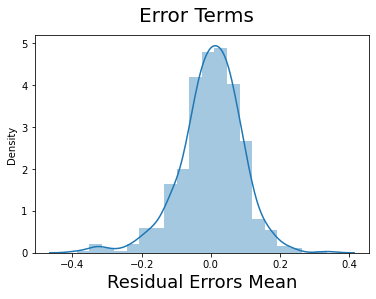

In [59]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize =20 )
plt.xlabel('Residual Errors Mean', fontsize= 18)
plt.show()

- From the above graph we can conclude that residuals are normally distributed
- Hence this linear regression model is valid

### Collinearity between the selected model variables

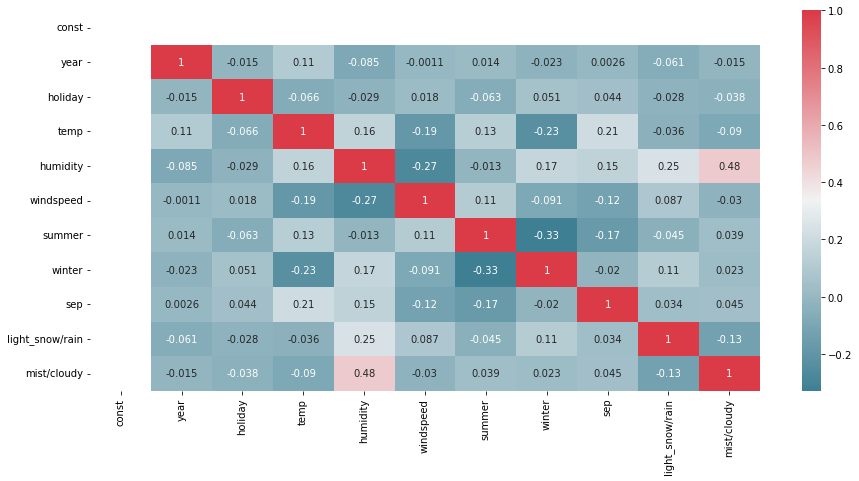

In [60]:
plt.figure(figsize = (15,7))
sns.heatmap(X_train_lm6.corr(), annot= True, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

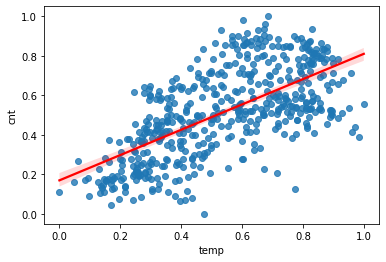

In [61]:
sns.regplot(data=X_train_lm6,x=X_train.temp, y= y_train, line_kws={"color": "red"})
plt.show()

##### The above graph shows a linear model between temperate and count  meaning if temperature increases, the Count variable increases

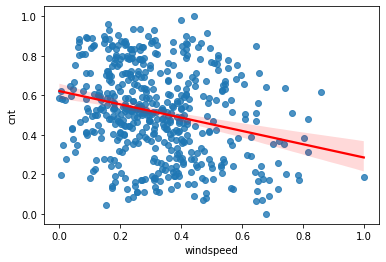

In [62]:
plt.figure()
sns.regplot(data=X_train_lm6,x=X_train['windspeed'], y= y_train, line_kws={"color": "red"})
plt.show()

##### The above graph shows a negetive linear regression model between windspeed and count meaning if windspeed increases , count decreases

## Checking Homoscedasticity of the model

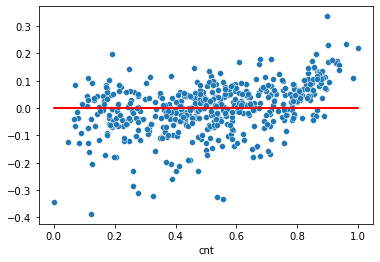

In [63]:
residual = y_train - y_train_pred
sns.scatterplot(y_train, residual)
plt.plot(y_train, (y_train-y_train) , 'r')
plt.show()

##### The above graph proves Homoscedasticity which means the variance of the residuals is constant 

# Step - 7 Making predictions using the final model

In [64]:
# Creating num vars
num_vars = ['humidity', 'temp', 'atemp','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow/rain,mist/cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.442680,0.249953,1.809432,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.201873,0.085527,0.439359,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000103,0.050926,0.698771,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.266209,0.176063,1.481350,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.442464,0.256314,1.777667,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.615578,0.321055,2.120341,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.810220,0.425781,2.881888,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing data into X_test and y_test

In [65]:
y_test = df_test.pop('cnt')
X_test = df_test
columns1 = X_train_new.columns
X_test = X_test[columns1]

In [66]:
#Adding constant to test dataframe
X_test_lm6 = sm.add_constant(X_test)

In [67]:
y_pred = lr6.predict(X_test_lm6)

# Step 8- Model Evaluation

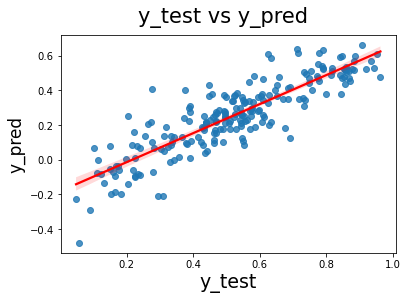

In [68]:
fig = plt.figure()
sns.regplot(y_test, y_pred, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize = 21)  
plt.xlabel('y_test', fontsize = 19)                         
plt.ylabel('y_pred', fontsize = 17)      
plt.show()

##### Above graph shows the linear regression model of Test dataset

In [69]:
y_test_lm6 = sm.add_constant(X_test_lm6)
lr6 = sm.OLS(y_test,X_test_lm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     93.50
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           2.67e-71
Time:                        20:43:19   Log-Likelihood:                 209.48
No. Observations:                 219   AIC:                            -397.0
Df Residuals:                     208   BIC:                            -359.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2376      0.046     

### Equation of best fit line
cnt = 0.2376 + (year x 0.2258) - (holiday x 0.0651) + (temp x 0.6783) - (humidity x 0.0836) - (windspeed x -0.0873) + (summer x 0.0883) + (winter x 0.1591) + (sep x 0.0927) - (Light_snowrain x -0.1408) - (mist/cloudy x -0.0283)

# Summary of Training and Test model

### R squared and adjusted R squared of training and test model
- X_train R-squared:       0.838 
- X_train Adj. R-squared:  0.834
- Y_test R-squared:        0.818
- Y_test Adj. R-squared:   0.809



### Variables that have the most significance in predicting the demand for shared bikes

- Year
- holiday
- temperature
- humidity
- windspeed
- summer
- winter
- september
- light snow/rain
- mist/cloudy

### The Significance of Coefficient in the hiring of bikes 

- The Coefficient value of Year indicates, that for a unit increase in Year the bike hiring number increases by coef val 0.2258 
- The Coefficient value of holiday indicates, that for a unit increase in holiday the bike hiring number decreases by coef val 0.0651 
- The Coefficient value of temperature indicates, that for a unit increase in temperature the bike hiring number increases by coef val 0.6783
- The Coefficient value of humidity indicates, that for a unit increase in humidity the bike hiring number decreases by coef val  0.0836
- The Coefficient value of windspeed indicates, that for a unit increase in windspeed the bike hiring number decreases by coef val 0.0873 
- The Coefficient value of summer indicates, that for a unit increase in summer the bike hiring number increases by coef val 0.0883
- The Coefficient value of winter indicates, that for a unit increase in winter the bike hiring number increases by coef val 0.1591
- The Coefficient value of september indicates, that for a unit increase in september the bike hiring number increases by coef val 0.0927
- The Coefficient value of light snow/rain indicates, that for a unit increase in light snow/rain the bike hiring number decreases by coef val 0.1408
- The Coefficient value of mist/cloudy indicates, that for a unit increase in mist/cloudy the bike hiring number decreases by coef val 0.0283